In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
housing_data = pd.read_csv('datasets/housing.csv')
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4324,-118.35,34.08,52.0,1710.0,350.0,727.0,355.0,4.5833,333900.0,<1H OCEAN
8938,-118.47,34.01,41.0,2704.0,557.0,1047.0,478.0,4.4211,462900.0,<1H OCEAN
20622,-121.44,39.00,20.0,755.0,147.0,457.0,157.0,2.4167,67000.0,INLAND
17670,-121.87,37.30,28.0,859.0,199.0,455.0,211.0,2.3293,215900.0,<1H OCEAN
9429,-122.68,38.07,26.0,1445.0,244.0,510.0,207.0,5.6305,430000.0,NEAR OCEAN


In [5]:
housing_data = housing_data.dropna()

In [6]:
housing_data.shape

(20433, 10)

In [7]:
housing_data.loc[housing_data['median_house_value'] == 500001].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [8]:
housing_data = housing_data.drop(housing_data.loc[housing_data['median_house_value'] == 500001].index)

In [9]:
housing_data.shape

(19475, 10)

In [10]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [12]:
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'])

In [14]:
housing_data.shape

(19475, 14)

In [15]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12356,-116.57,33.76,25.0,2616.0,547.0,581.0,343.0,3.1364,301600.0,0,1,0,0,0
3290,-122.66,39.03,27.0,1446.0,329.0,594.0,255.0,1.1650,53300.0,0,1,0,0,0
16629,-120.82,35.32,12.0,3522.0,683.0,1780.0,662.0,3.3958,215800.0,0,0,0,0,1
14686,-117.07,32.91,5.0,2234.0,256.0,894.0,253.0,10.3354,477600.0,1,0,0,0,0
9895,-122.29,38.28,38.0,2308.0,425.0,1272.0,406.0,3.6083,134200.0,0,0,0,1,0


In [16]:
X = housing_data.drop('median_house_value', axis=1)
Y = housing_data['median_house_value']

In [17]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [21]:
x_train.shape, x_test.shape

((15580, 13), (3895, 13))

In [22]:
y_train.shape, y_test.shape

((15580,), (3895,))

In [23]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [24]:
print("Training_score : ", linear_model.score(x_train, y_train))

Training_score :  0.6161453506376127


In [25]:
predictors = x_train.columns
predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [26]:
coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(coef)

ocean_proximity_INLAND       -7.525157e+17
ocean_proximity_NEAR BAY     -7.525157e+17
ocean_proximity_<1H OCEAN    -7.525157e+17
ocean_proximity_NEAR OCEAN   -7.525157e+17
ocean_proximity_ISLAND       -7.525157e+17
longitude                    -2.579869e+04
latitude                     -2.378535e+04
population                   -3.394177e+01
total_rooms                  -6.082946e+00
households                    5.041758e+01
total_bedrooms                8.797296e+01
housing_median_age            9.349633e+02
median_income                 3.815840e+04
dtype: float64


In [27]:
y_pred = linear_model.predict(x_test)

In [28]:
df_pred_actual = pd.DataFrame({'predicted':y_pred, 'actual':y_test})
df_pred_actual.head(10)

,predicted,actual
16087,226688.0,350000.0
16793,298240.0,260900.0
25,173056.0,107500.0
11710,118400.0,127800.0
79,161152.0,131300.0
7789,225152.0,185300.0
17268,274944.0,326800.0
1389,272256.0,211000.0
1458,248192.0,231100.0
11580,276480.0,218900.0


In [29]:
from sklearn.metrics import r2_score
print("Testing_score: ", r2_score(y_test, y_pred))

Testing_score:  0.5980495481441097


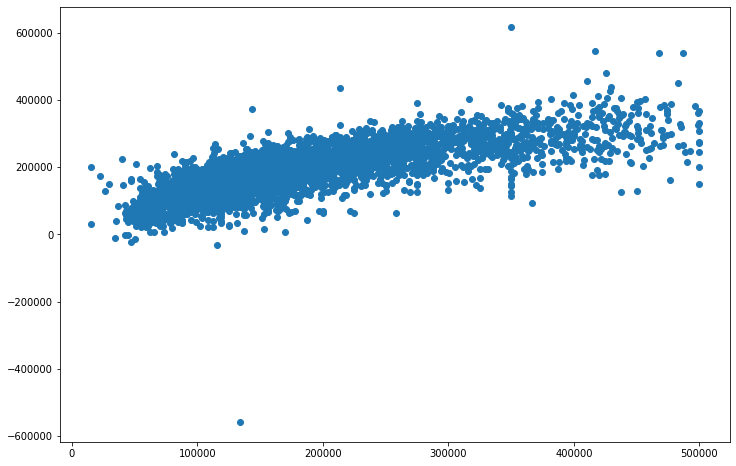

In [31]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(y_test, y_pred)
plt.show()

In [32]:
df_pred_actual_sample = df_pred_actual.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index()

In [33]:
df_pred_actual_sample.head()

,index,predicted,actual
0,2088,91392.0,59000.0
1,13003,113408.0,111600.0
2,20563,150144.0,132500.0
3,14917,238080.0,151900.0
4,15224,290560.0,240900.0


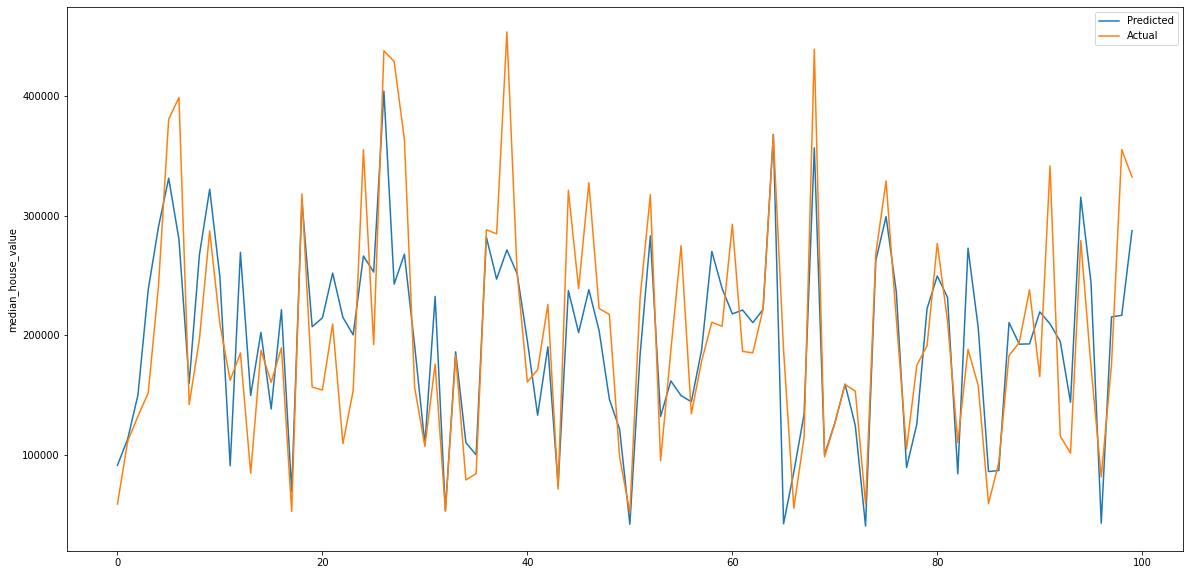

In [34]:
plt.figure(figsize = (20,10))

plt.plot(df_pred_actual_sample['predicted'], label='Predicted')
plt.plot(df_pred_actual_sample['actual'], label='Actual')

plt.ylabel('median_house_value')

plt.legend()
plt.show()